# Lab 1
## Solution
### John Evans
### 10/8/18

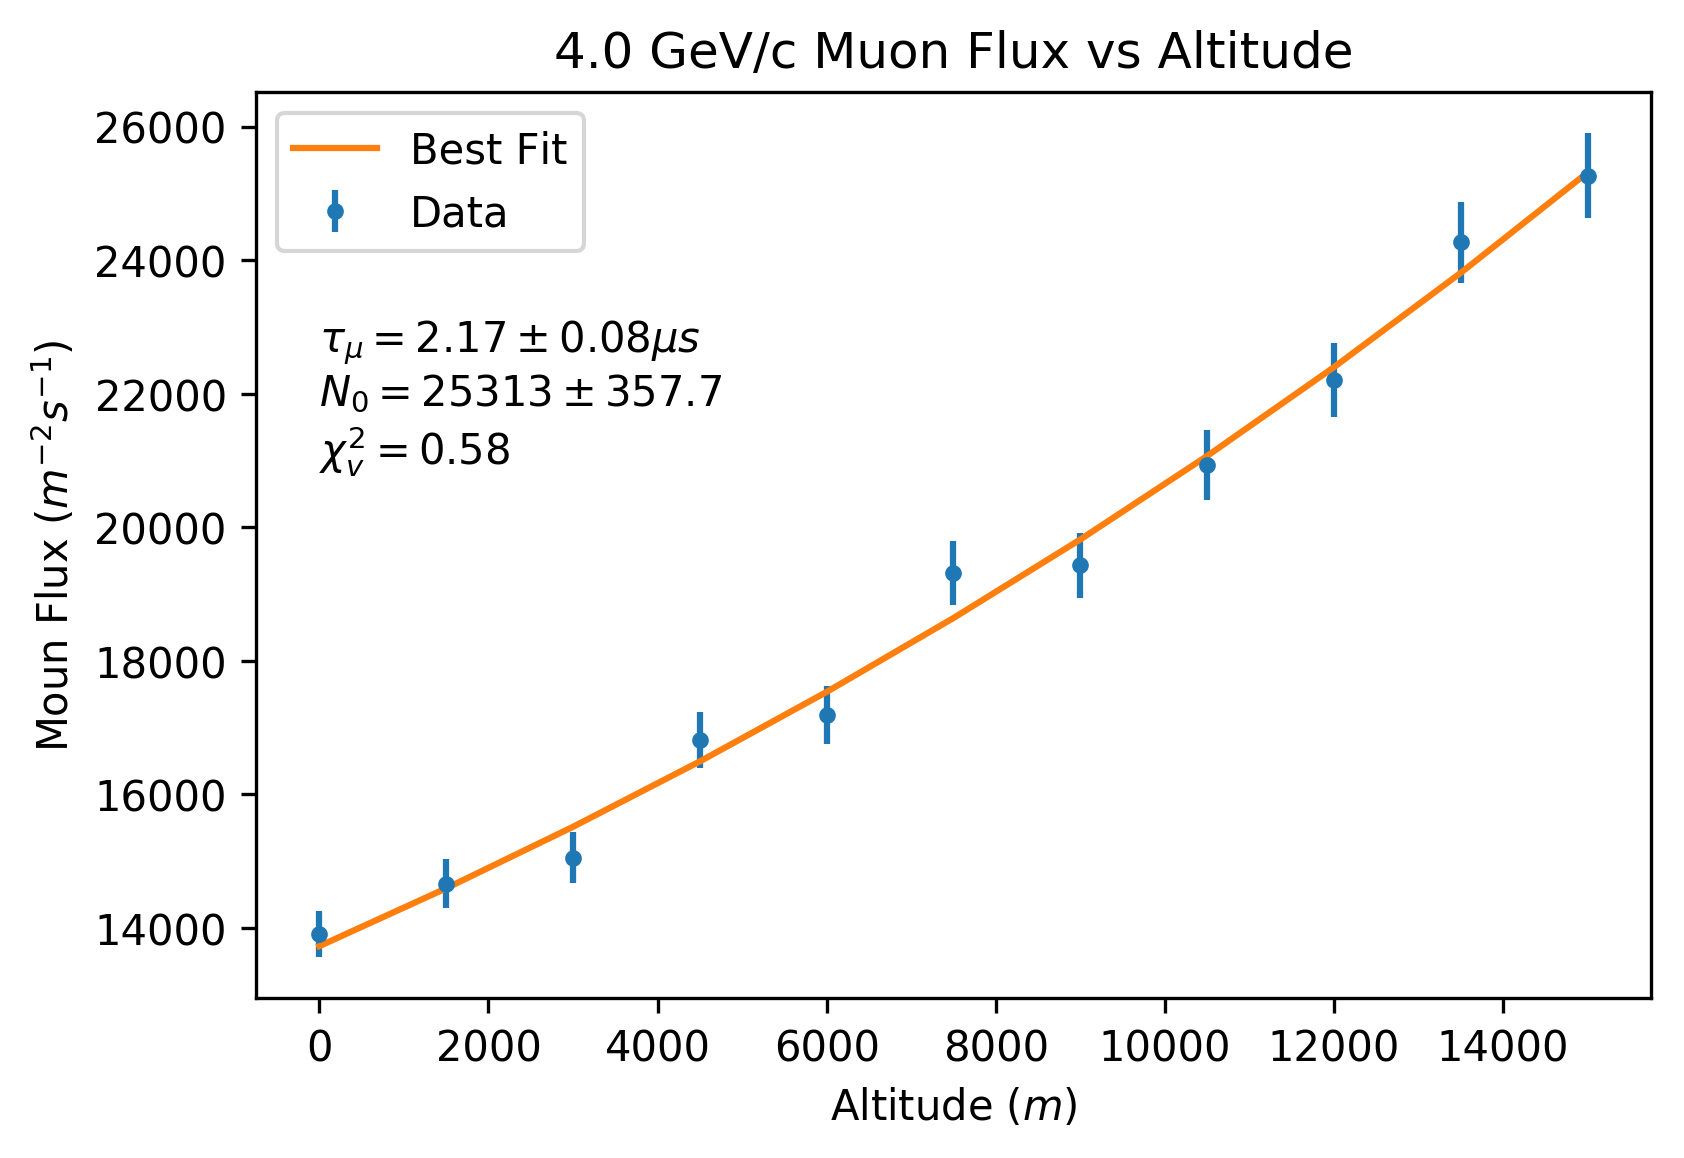

In [122]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# magic command to plot in jupyter notebook
%matplotlib inline

# make plots look nice in jupyter notebook
mpl.rcParams['figure.dpi'] = 300

# import csv data
datax, datay, sigma = np.loadtxt('./Lab_1_data_4GeV.csv', delimiter=',', unpack = True)

# computes reduced chi^2
def chi2(data, theory, sigma, **kwargs): return np.sum(((data - theory)/sigma)**2, **kwargs)
def chi2v(data, theory, sigma, v): return chi2(data, theory, sigma)/v

# computes N(l) from a given tau and N_0
def N_theory(length,tau,N_0): 
    p = 4        # assume muon momentum is 4.0 GeV/c
    c = 2.99e8   # speed of light in m/s
    m = 105.7e-3 # muon mass in GeV/c^2
    return N_0*np.exp(-length/(p*c*tau*1e-6/m))

# initial parameters for curve_fit
length = max(datax) - datax
tau    = 2.2
N_0    = 25000
p0     = (tau, N_0)

# use curve_fit to find best fit parameters and parameter errors
popt, pcov = curve_fit(N_theory, length, datay, p0=p0, sigma=sigma, absolute_sigma=True)

# get parameter errors from covariance matrix
perr = np.sqrt(np.diag(pcov))

# get reduced chi^2 for best fit
y_best     = N_theory(length, *popt)
v          = len(datax) # since parameters not fixed, they don't reduce degrees of freedom
chi2v_best = chi2v(datay, y_best, sigma, v)

# separaste variables for easier output
best_tau, best_N_0 = popt
tau_err,  N_0_err  = perr

# plot original data
plt.errorbar(datax, datay, yerr=sigma,linestyle='',marker='.',label='Data')

# add parameter information to plot
fit_info = '\n'.join([r'$\tau_{{\mu}}={:.3g}\pm{:.1g}\mu s$', 
                      r'$N_0={:.5g}\pm{:.4g}$', 
                      r'$\chi^2_v={:.3g}$'])
fit_info = fit_info.format(best_tau, tau_err, best_N_0, N_0_err, chi2v_best)
plt.text(0, 21e3, fit_info)

# plot best fit
plt.plot(datax, y_best, label='Best Fit')

# format and display plot
plt.legend()
plt.title('4.0 GeV/c Muon Flux vs Altitude')
plt.xlabel(r'Altitude $(m)$')
plt.ylabel(r'Moun Flux $(m^{-2}s^{-1})$')
plt.show()



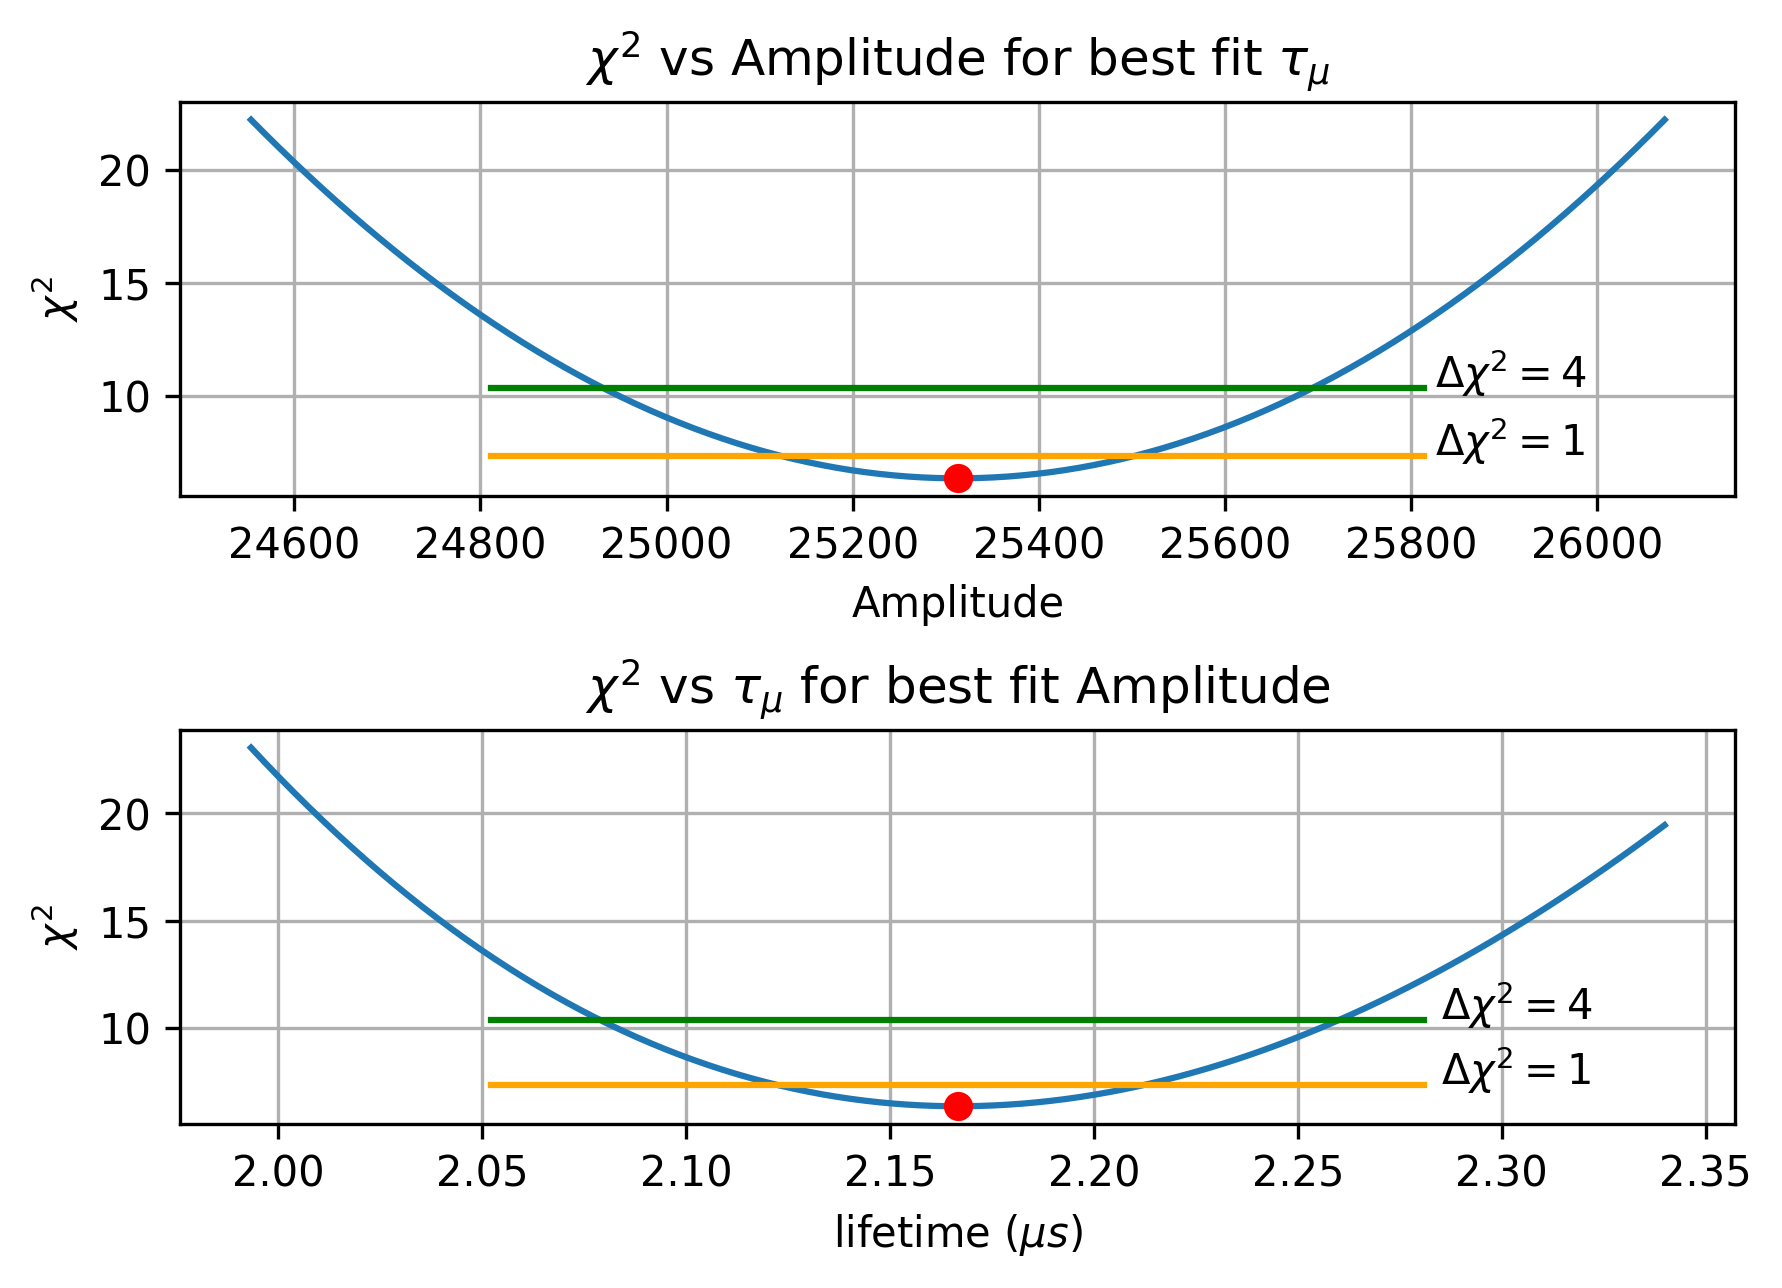

In [126]:
# format subplot area
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(h_pad=3.5)

# start top plot
ax   = axes[0]
N_0s = np.linspace(best_N_0*.97,best_N_0*1.03, 100)

# calculate chi2
chi2s = [chi2(datay, N_theory(length, best_tau, N_0), sigma) for N_0 in N_0s]

ax.plot(N_0s, chi2s)

# plot horizontal lines, best fit point, and text
ax.axhline(y = min(chi2s)+1, xmin = .2, xmax = .8, color = 'orange')
ax.axhline(y = min(chi2s)+4, xmin = .2, xmax = .8, color = 'g')
ax.plot(best_N_0, chi2v_best*v, color = 'r', marker = 'o')
ax.text(25825, min(chi2s)+1, r'$\Delta\chi^2=1$')
ax.text(25825, min(chi2s)+4, r'$\Delta\chi^2=4$')

# format plot
ax.set_title(r'$\chi^2$ vs Amplitude for best fit $\tau_\mu$')
ax.set_xlabel('Amplitude')
ax.set_ylabel(r'$\chi^2$')
ax.grid(True)

# start bottom plot
ax   = axes[1]
taus = np.linspace(best_tau*.92,best_tau*1.08, 100)

# calculate chi2
chi2s = [chi2(datay, N_theory(length, tau, best_N_0), sigma) for tau in taus]

ax.plot(taus, chi2s)

# plot horizontal lines, best fit point, and text
ax.axhline(y = min(chi2s)+1, xmin = .2, xmax = .8, color = 'orange')
ax.axhline(y = min(chi2s)+4, xmin = .2, xmax = .8, color = 'g')
ax.plot(best_tau, chi2v_best*v, color = 'r', marker = 'o')
ax.text(2.285, min(chi2s)+1, r'$\Delta\chi^2=1$')
ax.text(2.285, min(chi2s)+4, r'$\Delta\chi^2=4$')

# format plot
ax.set_title(r'$\chi^2$ vs $\tau_\mu$ for best fit Amplitude')
ax.set_xlabel(r'lifetime ($\mu s$)')
ax.set_ylabel(r'$\chi^2$')
ax.grid(True)

plt.show()

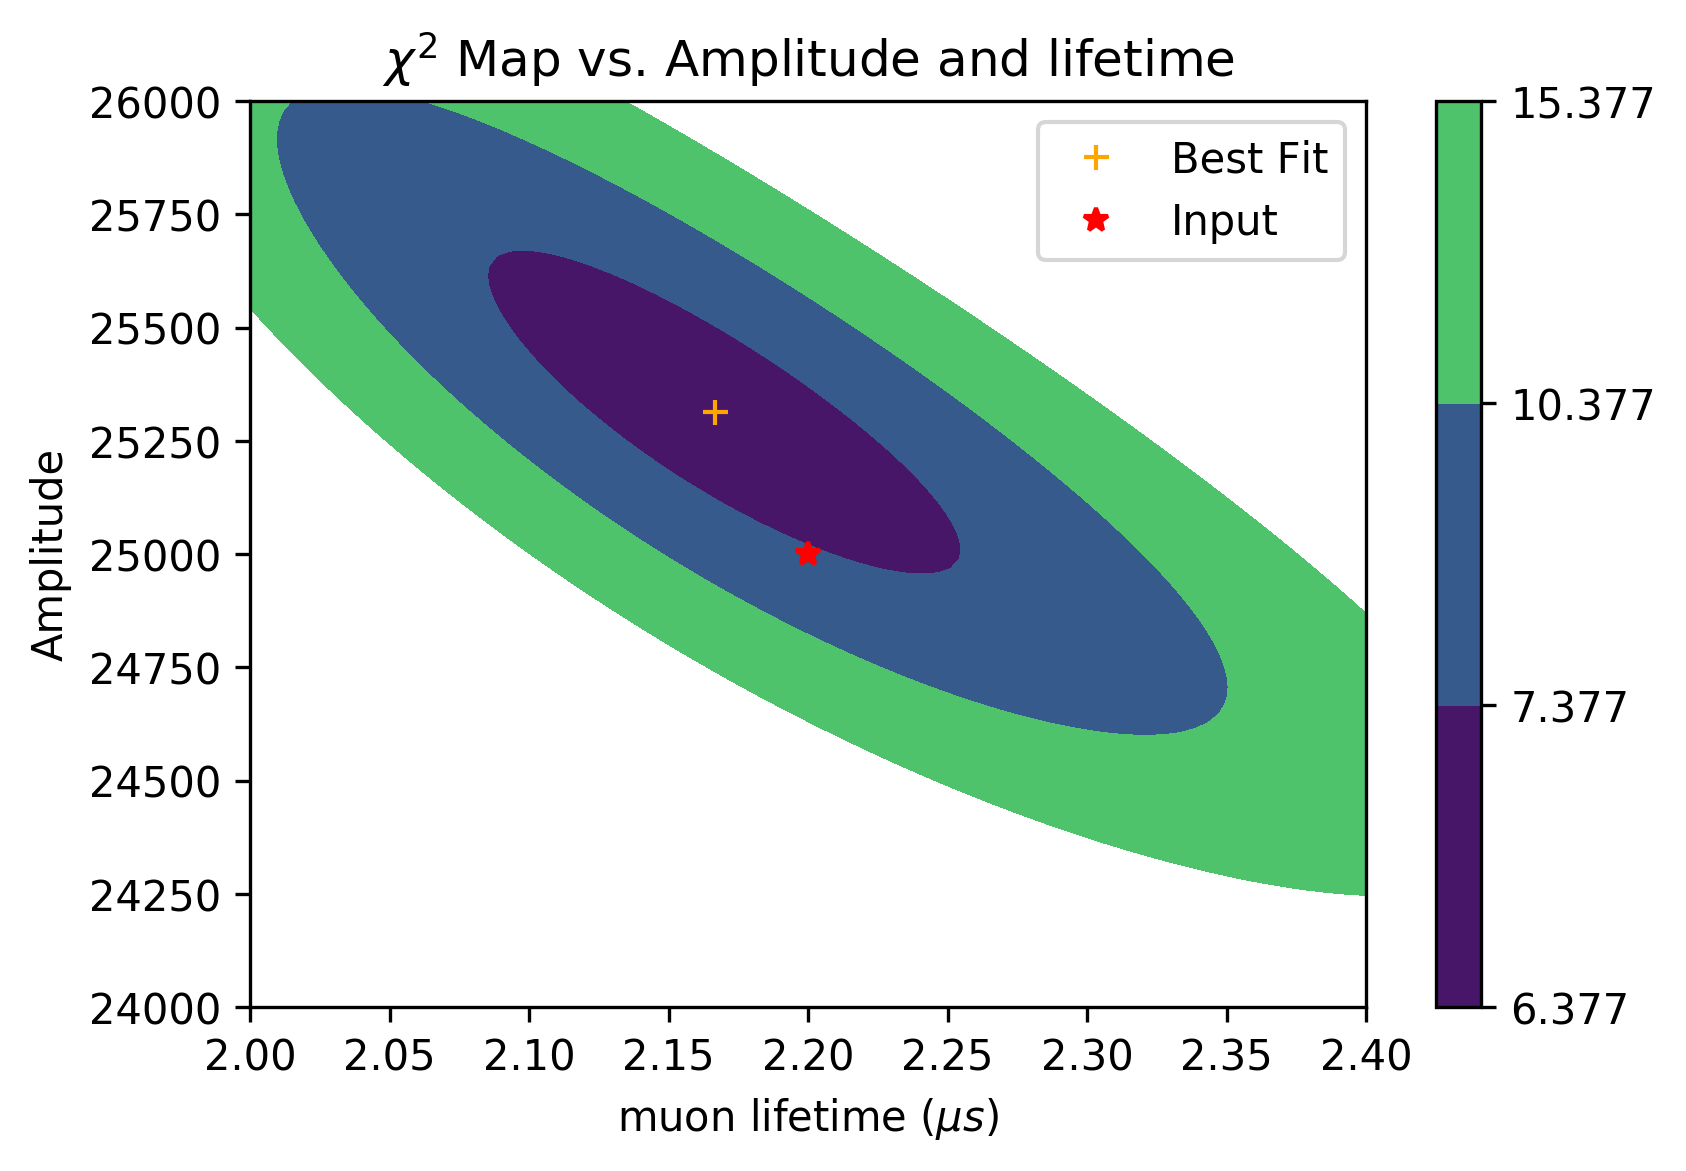

In [125]:
# dim**2 chi2 calculations
dim = 100

# number of data points
pts = len(datay)

# reshape tau and N_0 values for contourf
xv, yv = np.meshgrid(np.linspace(2, 2.4, dim), np.linspace(2.4e4, 2.6e4, dim))

# reshape data for contour chi2 calculation
lengthv, datayv, sigmav = (np.broadcast_to(a, (dim,dim,pts)) for a in (length, datay, sigma))

# reshape tau and N_0 for chi2 calculation
xv2, yv2 = (np.dstack([a]*pts) for a in (xv, yv))

# calculate chi2 for contourf
z = chi2(datayv, N_theory(lengthv, xv2, yv2), sigmav, axis = 2)

# plot contour
cs = plt.contourf(xv, yv, z, [6.377, 7.377, 10.377, 15.377])

# plot initial values and best fit values
plt.plot(best_tau, best_N_0, marker = '+', linestyle = '', color = 'orange', label = 'Best Fit')
plt.plot(tau, N_0, marker = '*', linestyle = '', color = 'red', label = 'Input')

# format plot
plt.colorbar(cs)
plt.title(r'$\chi^2$ Map vs. Amplitude and lifetime')
plt.ylabel('Amplitude')
plt.xlabel(r'muon lifetime ($\mu s$)')
plt.legend()
plt.show()